# Telco Customer Churn EDA and Prediction
- Data Link : https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data
 ![image.png](attachment:67c71665-c51a-4d8c-a32f-55b318eb644a.png)

##### Feature Description
- customerID : Customer ID
- gender : Whether the customer is a male or a femal
- SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
- Partner : Whether the customer has a partner or not (Yes,No)
- Dependents : Whether the customer has dependents or not (Yes,No)
- tenure : Number of months the customer has stayed with the company
- PhoneService : Whether the customer has a phone service or not (Ye, No)
- MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone srvice)
- InternetService : Customer’s internet service provider (DSL, Fiber optical, No)
- OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection : Whether the customer has device protection or not (Yes, No, No internt service)
- TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV : Whether the customer has streaming TV or not (Yes, No, No inteSet service)
- StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No intrnet service)
- Contract : The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling : Whether the customer has paperless billing or not (Yes, No).
- PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).
- MonthlyCharges : The amount charged to the customer monthly
- TotalCharges : The total amount charged to the customer
- Churn : Whether the customer churned or not (Yes or No)the customer churned or not (Yes or No)

### Import Libiraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler ,OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

### Read Dataset

In [46]:
df = pd.read_csv(r"/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
pd.set_option('display.max_columns',None)
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Dataset Overview

In [47]:
def data_insight(df):
    cols = []
    nunique_v = []
    missing_v = []
    data_type = []
    unique_v = []

    for col in df.columns:
        cols.append(col)
        nunique_v.append(df[col].nunique())
        data_type.append(df[col].dtypes)
        missing_v.append(df[col].isnull().sum())
        unique_v.append(df[col].unique())

    return pd.DataFrame({
        'Column name': cols,
        'Data type': data_type,
        "Unique Value": unique_v,
        'Num unique': nunique_v,
        'Num missing': missing_v
    })


In [48]:
data_insight(df)

,Column name,Data type,Unique Value,Num unique,Num missing
0,customerID,object,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",7043,0
1,gender,object,"[Female, Male]",2,0
2,SeniorCitizen,int64,"[0, 1]",2,0
3,Partner,object,"[Yes, No]",2,0
4,Dependents,object,"[No, Yes]",2,0
5,tenure,int64,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",73,0
6,PhoneService,object,"[No, Yes]",2,0
7,MultipleLines,object,"[No phone service, No, Yes]",3,0
8,InternetService,object,"[DSL, Fiber optic, No]",3,0
9,OnlineSecurity,object,"[No, Yes, No internet service]",3,0


### Problems
- TotalCharges is object columns

In [49]:
df.describe(include='O').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [50]:
df.shape

(7043, 21)

### Handel Problem

#### Duplicate

In [51]:
df.drop('customerID',axis=1,inplace= True)

In [52]:
df[df.duplicated()]
df.drop_duplicates(inplace=True)
df.reset_index()
df.duplicated().sum()


0

In [53]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### TotalCharges invalid values

In [54]:
df.TotalCharges.describe()

,TotalCharges
count,7021
unique,6531
top,
freq,11


- There is empty values in TotalCharges columns

In [55]:
df[df['TotalCharges'] == ' '].value_counts().sum()

11

#### Handel Missing Values

In [56]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [57]:
df.TotalCharges.dtype

dtype('float64')

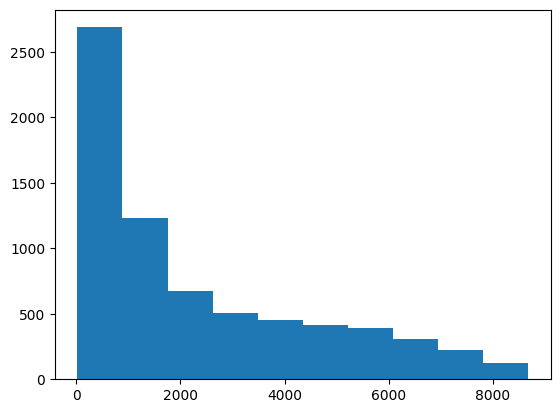

In [58]:
plt.hist(df['TotalCharges'])
plt.show()

- Depend on Histogram datais skewed so we will fill null value with median

In [59]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
df['TotalCharges'].isnull().sum()

0

✔️ Handel missing values

#### Preprocessing

In [60]:
df.columns = df.columns.str.lower()
df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

#### Balancing Data

In [61]:
df['churn'].value_counts()
df.churn.value_counts(normalize=True)

,proportion
churn,
No,0.735508
Yes,0.264492


- Data is unbalanced

In [62]:
df['seniorcitizen'] = df['seniorcitizen'].astype('object')
df.seniorcitizen.dtypes
df['churn'] = (df.churn == 'Yes').astype('int')

In [63]:
numirc_col = list(df.select_dtypes(include=['number']).columns)
categorical_col = list(df.select_dtypes(include=['object']).columns)
categorical_col
numirc_col.remove('churn') # i wnat only features not target column


### Feature importance Using Risk Ratio

In [64]:
global_mean = df.churn.mean()
round(global_mean,2)
df.columns
for col in categorical_col:
    print(f'{"-"*10} {col} {"-"*10}')
    print(df.groupby(col).churn.mean() / global_mean)

---------- gender ----------
gender
Female    1.014740
Male      0.985514
Name: churn, dtype: float64
---------- seniorcitizen ----------
seniorcitizen
0    0.888623
1    1.573965
Name: churn, dtype: float64
---------- partner ----------
partner
No     1.241123
Yes    0.743496
Name: churn, dtype: float64
---------- dependents ----------
dependents
No     1.178670
Yes    0.584147
Name: churn, dtype: float64
---------- phoneservice ----------
phoneservice
No     0.942435
Yes    1.006193
Name: churn, dtype: float64
---------- multiplelines ----------
multiplelines
No                  0.939594
No phone service    0.942435
Yes                 1.081691
Name: churn, dtype: float64
---------- internetservice ----------
internetservice
DSL            0.714278
Fiber optic    1.579628
No             0.272560
Name: churn, dtype: float64
---------- onlinesecurity ----------
onlinesecurity
No                     1.574082
No internet service    0.272560
Yes                    0.552424
Name: churn, dt

<ipython-input-65-0f212a0bc91a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(x=col, y='churn', data=df_group, palette='Blues')


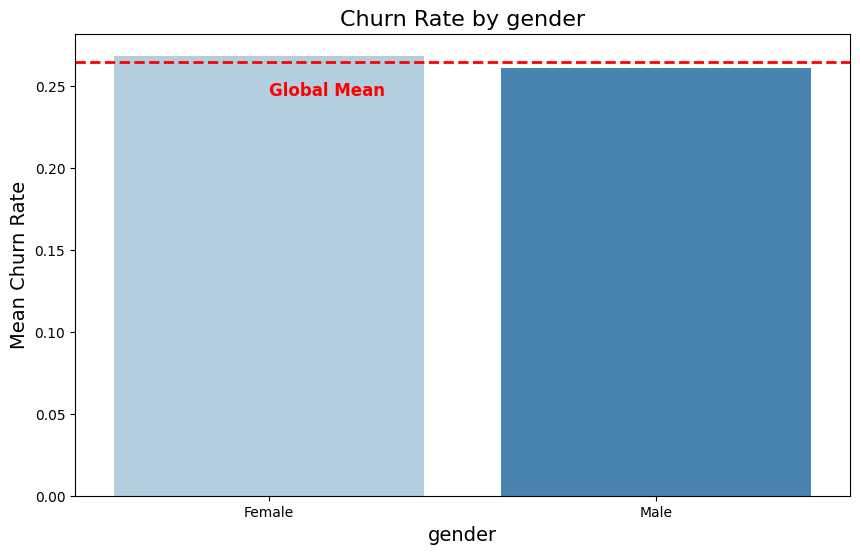

<ipython-input-65-0f212a0bc91a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(x=col, y='churn', data=df_group, palette='Blues')


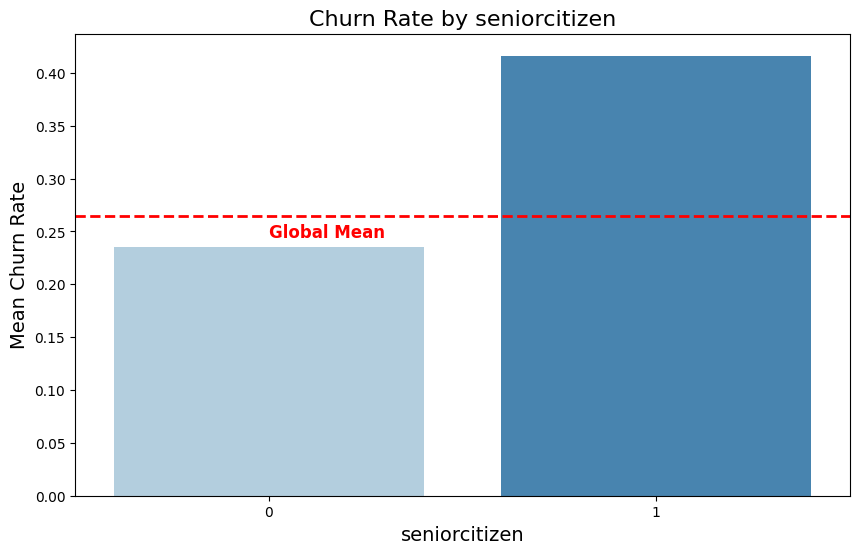

<ipython-input-65-0f212a0bc91a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(x=col, y='churn', data=df_group, palette='Blues')


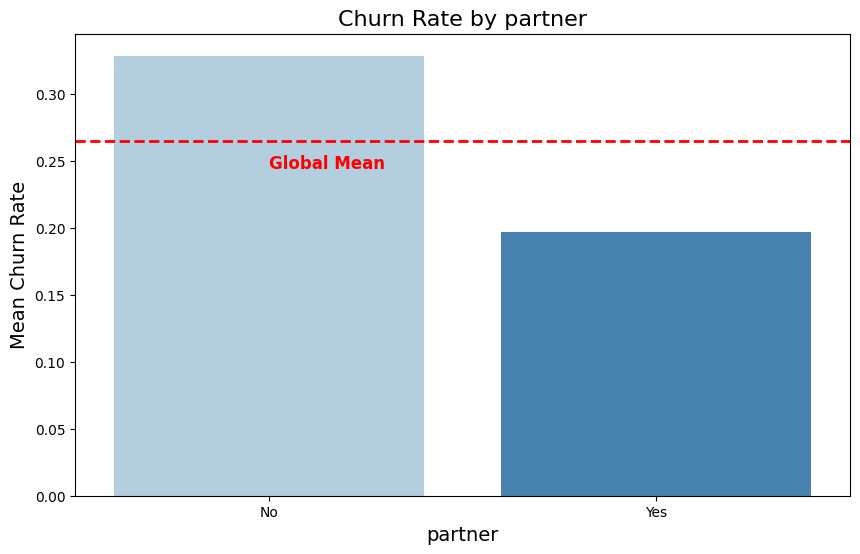

<ipython-input-65-0f212a0bc91a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(x=col, y='churn', data=df_group, palette='Blues')


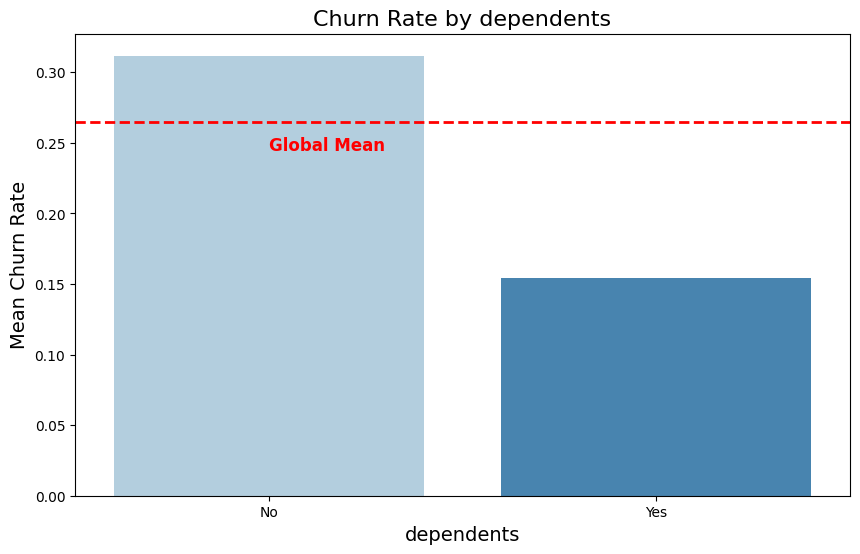

<ipython-input-65-0f212a0bc91a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(x=col, y='churn', data=df_group, palette='Blues')


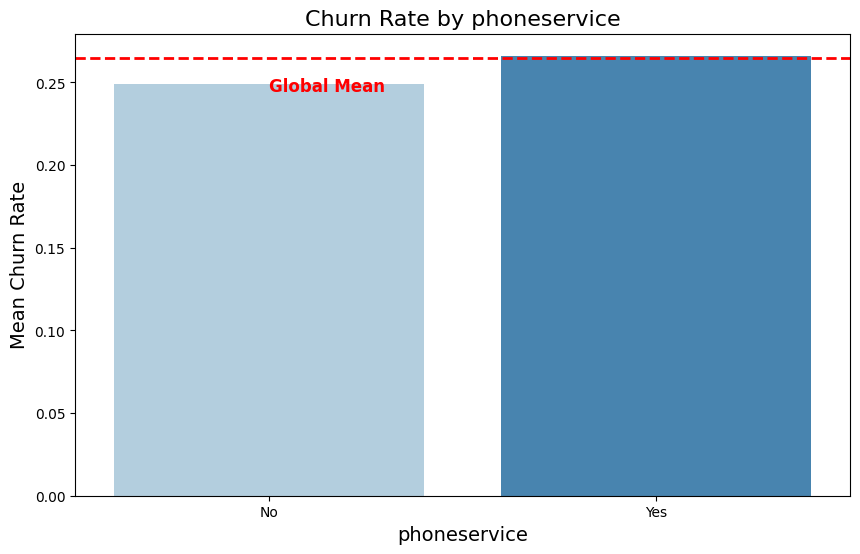

<ipython-input-65-0f212a0bc91a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(x=col, y='churn', data=df_group, palette='Blues')


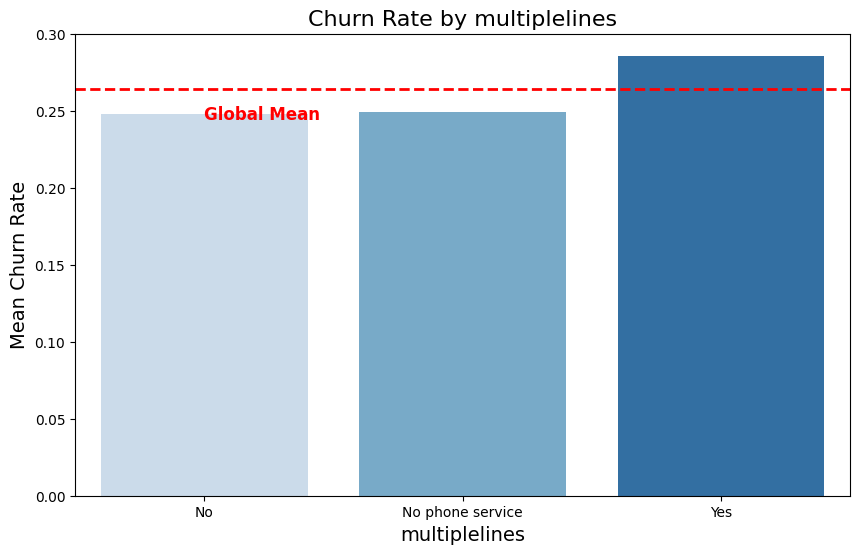

<ipython-input-65-0f212a0bc91a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(x=col, y='churn', data=df_group, palette='Blues')


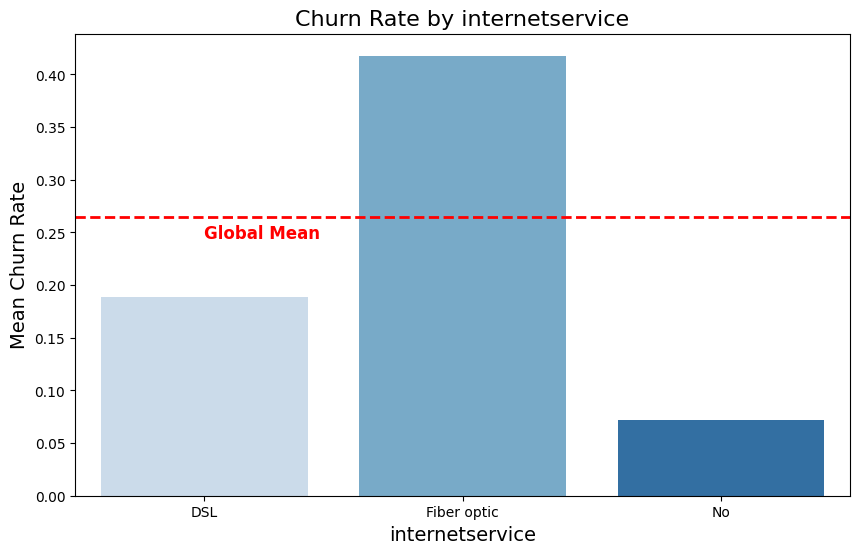

<ipython-input-65-0f212a0bc91a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(x=col, y='churn', data=df_group, palette='Blues')


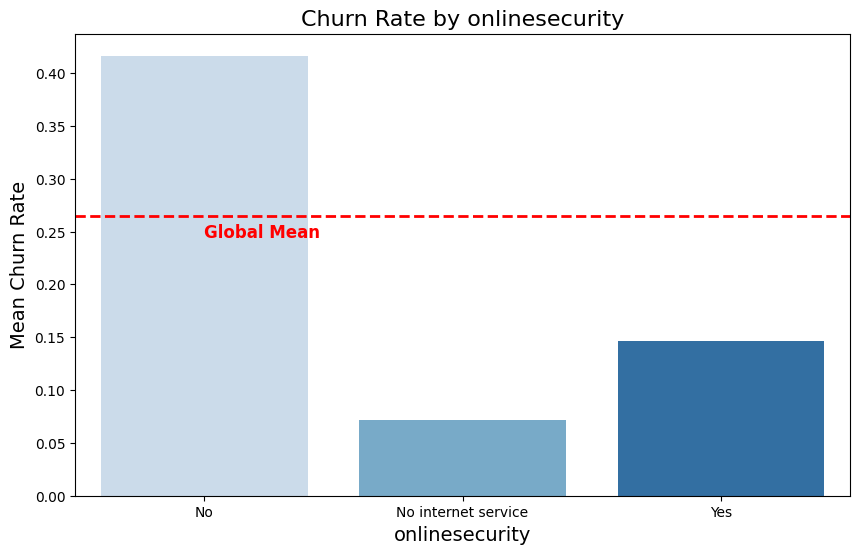

<ipython-input-65-0f212a0bc91a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(x=col, y='churn', data=df_group, palette='Blues')


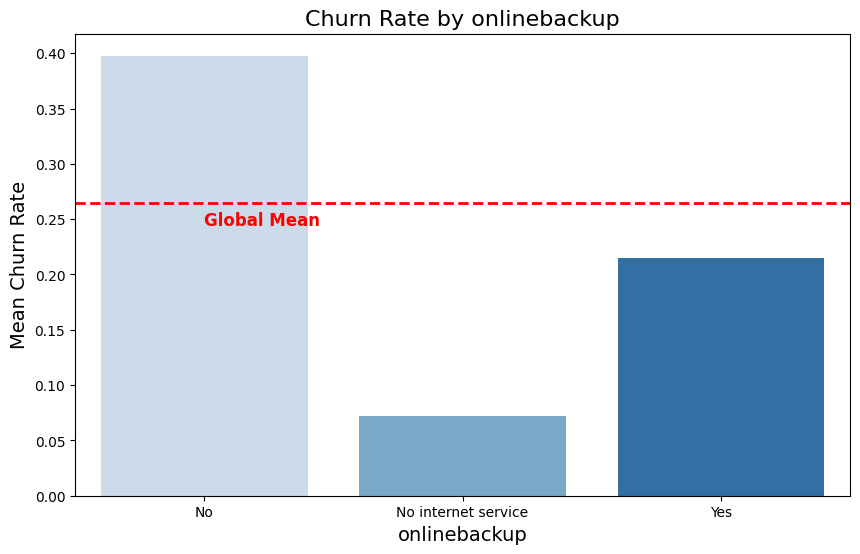

<ipython-input-65-0f212a0bc91a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(x=col, y='churn', data=df_group, palette='Blues')


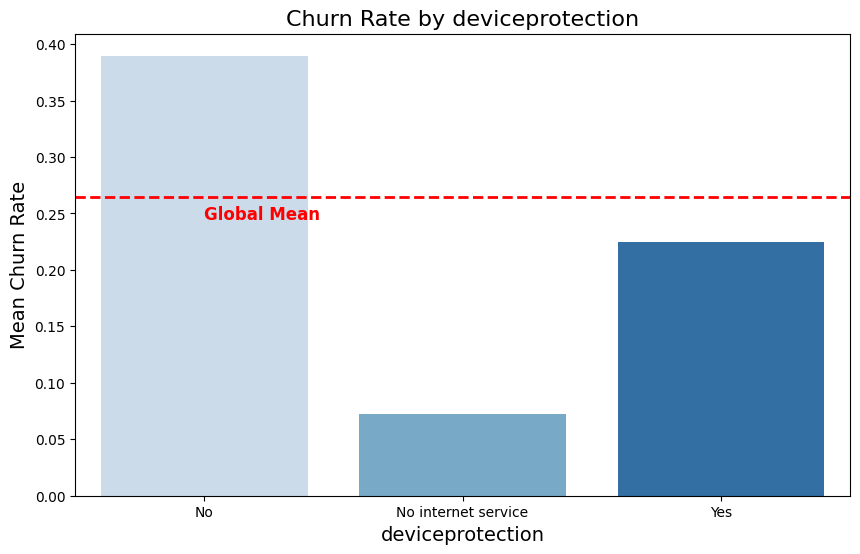

<ipython-input-65-0f212a0bc91a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(x=col, y='churn', data=df_group, palette='Blues')


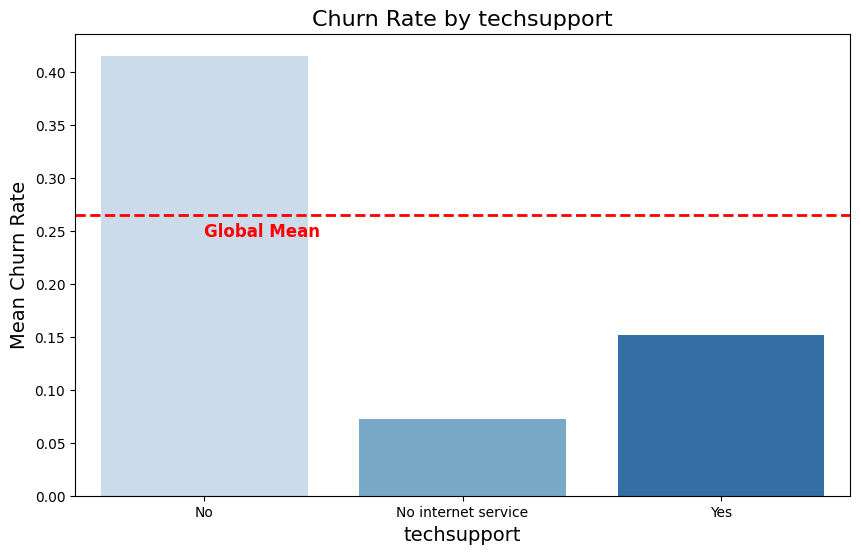

<ipython-input-65-0f212a0bc91a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(x=col, y='churn', data=df_group, palette='Blues')


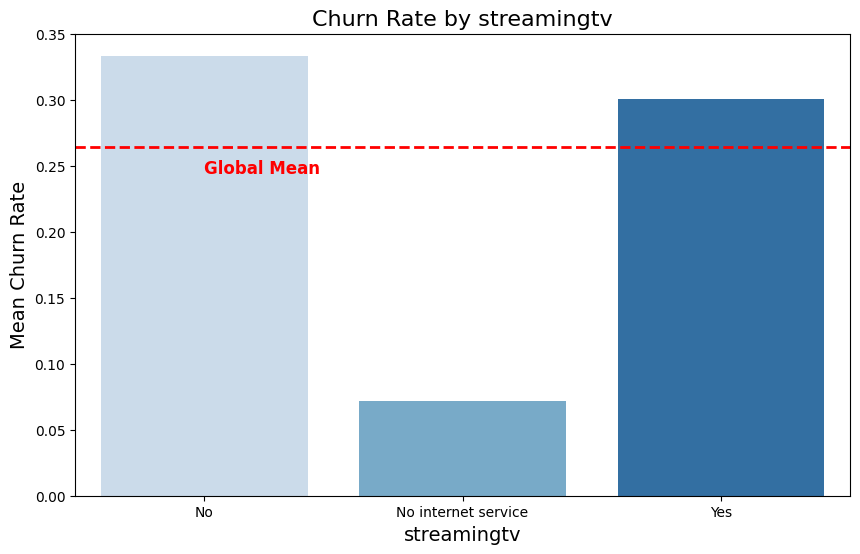

<ipython-input-65-0f212a0bc91a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(x=col, y='churn', data=df_group, palette='Blues')


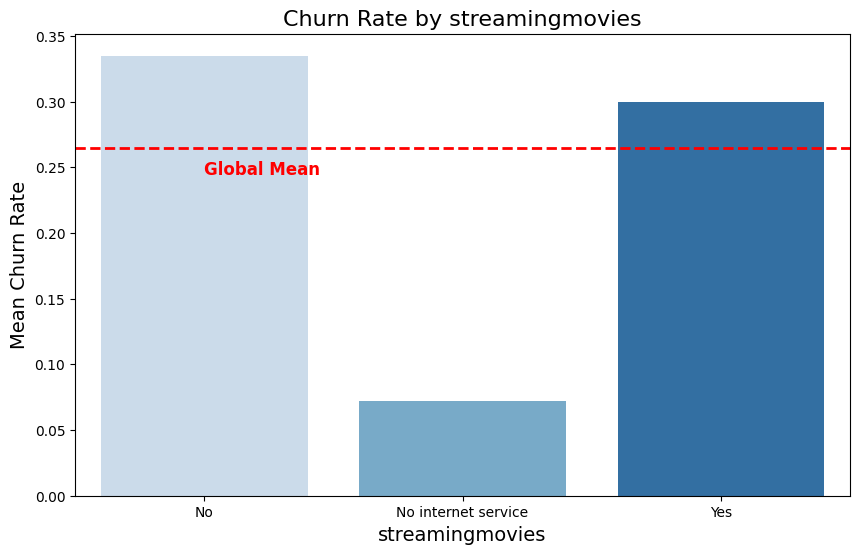

<ipython-input-65-0f212a0bc91a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(x=col, y='churn', data=df_group, palette='Blues')


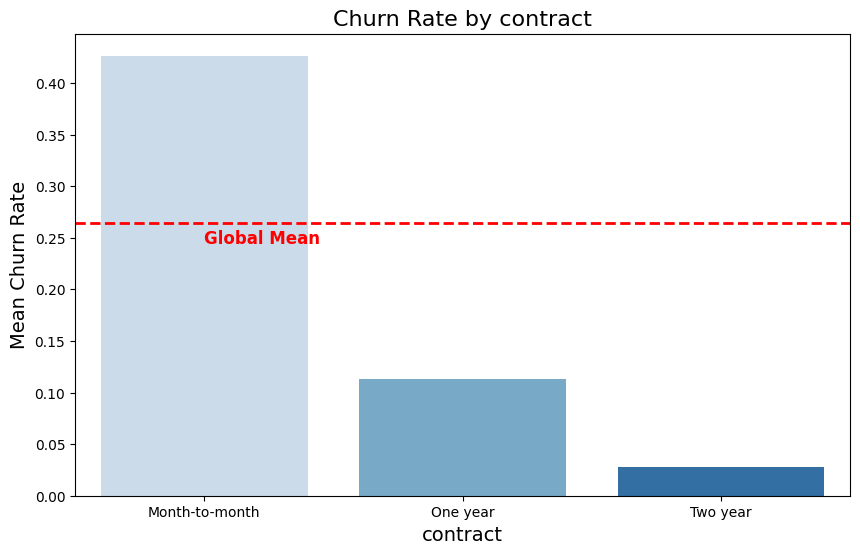

<ipython-input-65-0f212a0bc91a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(x=col, y='churn', data=df_group, palette='Blues')


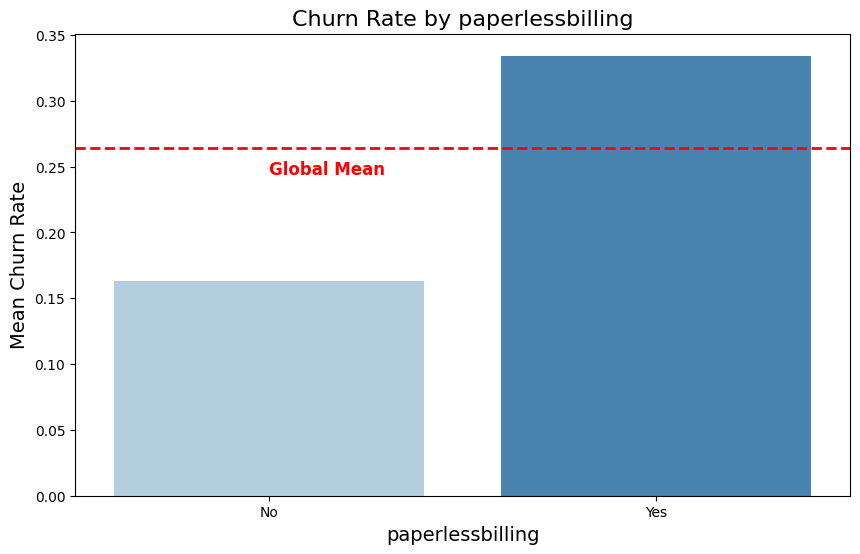

<ipython-input-65-0f212a0bc91a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(x=col, y='churn', data=df_group, palette='Blues')


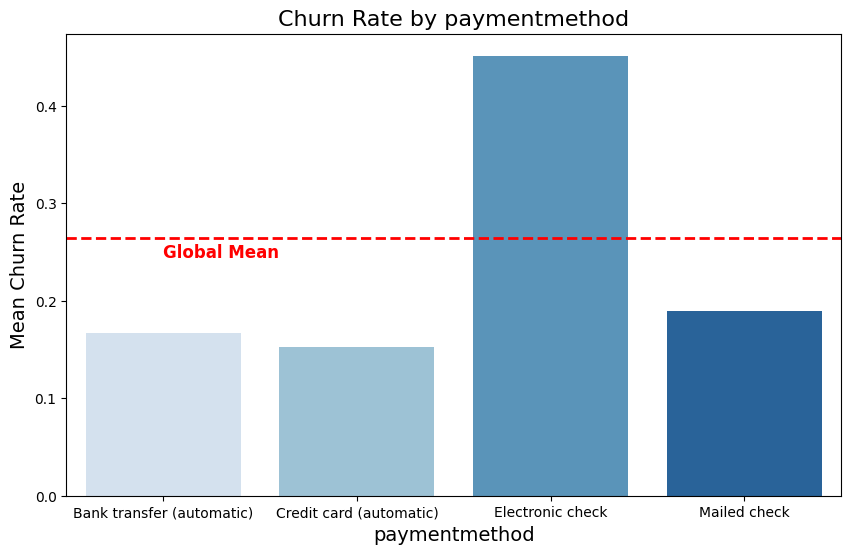

In [65]:
for col in categorical_col:

    df_group = df.groupby(by=col)['churn'].mean().reset_index()
    plt.figure(figsize=(10, 6))
    graph = sns.barplot(x=col, y='churn', data=df_group, palette='Blues')
    graph.axhline(global_mean, linewidth=2, color='red', linestyle='--')
    plt.text(0, global_mean - 0.02, "Global Mean", color='red', weight='bold', fontsize=12)
    plt.title(f'Churn Rate by {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Mean Churn Rate', fontsize=14)
    plt.show()


In [66]:
df[numirc_col].corrwith(df.churn)

,0
tenure,-0.351508
monthlycharges,0.194508
totalcharges,-0.197914


- Tenure and Churn:
    - Negative correlation (~ -0.35) between tenure and churn.
    - Customers with longer tenure are less likely to churn.

- Monthly Charges and Churn:

    - Moderate positive correlation (~ 0.19).
    - Higher monthly charges may increase the likelihood of churn.
- Total Charges and Churn:

    - Slightly positive correlation (~ 0.20), but less than monthly charges.
    - Higher total charges might also contribute to higher churn rates.

### Encoding

In [67]:
df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [68]:
df = df.drop(columns=['phoneservice_Yes', 'multiplelines_No phone service', 'multiplelines_Yes'], errors='ignore')

mappings = {
    'gender': {'Female': 0, 'Male': 1},
    'seniorcitizen': {'No': 0, 'Yes': 1},
    'partner': {'No': 0, 'Yes': 1},
    'dependents': {'No': 0, 'Yes': 1},
    'internetservice': {'DSL': 0, 'Fiber optic': 1, 'No': 2},
    'onlinesecurity': {'No': 0, 'Yes': 1, 'No internet service': 2},
    'onlinebackup': {'Yes': 0, 'No': 1, 'No internet service': 2},
    'deviceprotection': {'No': 0, 'Yes': 1, 'No internet service': 2},
    'techsupport': {'No': 0, 'Yes': 1, 'No internet service': 2},
    'streamingtv': {'No': 0, 'Yes': 1, 'No internet service': 2},
    'streamingmovies': {'No': 0, 'Yes': 1, 'No internet service': 2},
    'contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2},
    'paperlessbilling': {'No': 0, 'Yes': 1},
    'paymentmethod': {'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3},
    'churn': {'No': 0, 'Yes': 1},
    'multiplelines': {'No': 0, 'Yes': 1, 'No phone service': 2},
    'phoneservice': {'No': 0, 'Yes': 1}
}
for column, mapping in mappings.items():
    if column in df.columns:
        df[column] = df[column].replace(mapping)

In [69]:
tenure_bins = [0, 9, 29, 55, 72]
tenure_labels = [0, 1, 2, 3]

monthlycharges_bins = [18.25, 35.75, 70.4, 89.9, 118.75]
monthlycharges_labels = [0, 1, 2, 3]

totalcharges_bins = [18.8, 411.15, 1403.875, 3801.7, 8684.8]
totalcharges_labels = [0, 1, 2, 3]

df['tenure'] = pd.cut(df['tenure'], bins=tenure_bins, labels=tenure_labels)
df['monthlycharges'] = pd.cut(df['monthlycharges'], bins=monthlycharges_bins, labels=monthlycharges_labels)
df['totalcharges'] = pd.cut(df['totalcharges'], bins=totalcharges_bins, labels=totalcharges_labels)

df['tenure'] = df['tenure'].astype('category').cat.codes
df['monthlycharges'] = df['monthlycharges'].astype('category').cat.codes
df['totalcharges'] = df['totalcharges'].astype('category').cat.codes

df = pd.get_dummies(df, drop_first=True , dtype='int')



- tenure_bins: Created based on the quantiles or natural breaks in the data (0-9, 10-29, 30-55, 56-72).
- monthlycharges_bins: Created based on the quartiles (18.25-35.75, 36-70.4, 71-89.9, 90-118.75).
- totalcharges_bins: Created based on the quartiles and extreme values (18.8-411.15, 412-1403.875, 1404-3801.7, 3802-8684.8).

In [70]:
data_insight(df)

,Column name,Data type,Unique Value,Num unique,Num missing
0,gender,int64,"[0, 1]",2,0
1,seniorcitizen,int64,"[0, 1]",2,0
2,partner,int64,"[1, 0]",2,0
3,dependents,int64,"[0, 1]",2,0
4,tenure,int8,"[0, 2, 1, 3, -1]",5,0
5,phoneservice,int64,"[0, 1]",2,0
6,multiplelines,int64,"[2, 0, 1]",3,0
7,internetservice,int64,"[0, 1, 2]",3,0
8,onlinesecurity,int64,"[0, 1, 2]",3,0
9,onlinebackup,int64,"[0, 1, 2]",3,0


### Balnce

In [71]:
df.churn.value_counts(normalize=True)

,proportion
churn,
0,0.735508
1,0.264492


In [72]:
df_majority = df[df['churn'] == 0]
df_minority = df[df['churn'] == 1]

df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)

df = pd.concat([df_majority, df_minority_upsampled])

df.churn.value_counts(normalize=True)

,proportion
churn,
0,0.5
1,0.5


## Modeling

In [73]:
y=df['churn']
x=df.drop(['churn'],axis=1)

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=33,random_state=42)


### Logistic Regression

In [75]:
lr = LogisticRegression()
model= lr.fit(x_test,y_test)

In [76]:
Logistic_Accu = model.score(x_test,y_test)
print(f"Logistic Regression :{Logistic_Accu}")

Logistic Regression :0.8787878787878788


### Decision Tree

In [77]:
params={
    'criterion':['entropy','gini'],
    'max_depth':[3,4,5,6,7,8,9,10]
}

model=DecisionTreeClassifier()

grid=GridSearchCV(
    estimator=model,
    param_grid=params,
    scoring='accuracy',
    cv=5
)

grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [78]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 10}

In [79]:
model=DecisionTreeClassifier(criterion='gini',max_depth=10,ccp_alpha=0.04)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.04, max_depth=10)

In [80]:
y_pred=model.predict(x_test)

In [81]:
D_Tree_Accu = accuracy_score(y_test, y_pred)
print(f"Decision Tree :{D_Tree_Accu}")

Decision Tree :0.7272727272727273


### SVC

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

svc_model = SVC(kernel='linear', C=1.0, random_state=42)

svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)

SVC_accuracy = accuracy_score(y_test, y_pred)
print(f'SVC Accuracy: {SVC_accuracy}')

SVC Accuracy: 0.7878787878787878


### XGBoost

In [83]:
import xgboost as xgb

model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    gamma=0,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_XG = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy_XG:.2f}")

Accuracy: 0.82


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:51:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## Final Suitable model

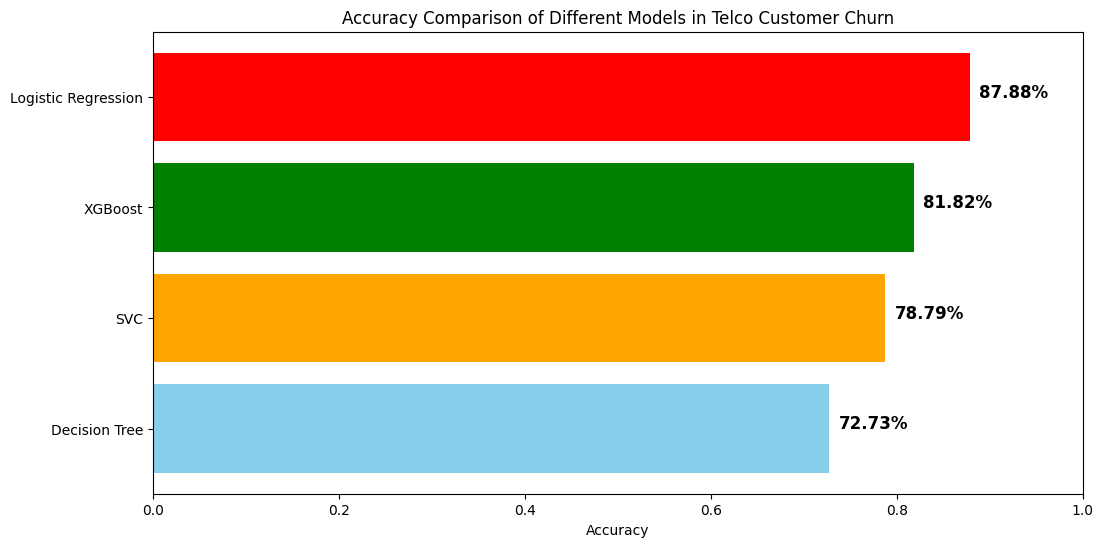

In [84]:
accuracy_scores = {
    'Logistic Regression': Logistic_Accu,
    'SVC': SVC_accuracy,
    'Decision Tree': D_Tree_Accu,
    'XGBoost': accuracy_XG,

}

sorted_accuracy_scores = dict(sorted(accuracy_scores.items(), key=lambda item: item[1]))


plt.figure(figsize=(12, 6))
bars = plt.barh(list(sorted_accuracy_scores.keys()), list(sorted_accuracy_scores.values()), color=['skyblue', 'orange', 'green', 'red'])

for bar in bars:
    plt.text(bar.get_width() + 0.01,
             bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2%}',
             fontsize=12,  #
             fontweight='bold')

plt.xlabel('Accuracy')
plt.title('Accuracy Comparison of Different Models in Telco Customer Churn')
plt.xlim(0, 1)
plt.show()

### Saving Model

In [85]:
import joblib
lr = LogisticRegression()
model = lr.fit(X_train, y_train)  # Fit your model on training data

# Save the model to a file
joblib.dump(model, 'logistic_regression_model.pkl')


['logistic_regression_model.pkl']

In [86]:
df2.columns.str.lower()

NameError: name 'df2' is not defined